In [1]:
# Libraries to load
import pandas as pd
import numpy as np 
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# data visualization packages 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
pd.set_option('max_columns', None)
import pandas_profiling

# SMOTE package to address imbalanced classes 
from imblearn.over_sampling import SMOTE 

from warnings import filterwarnings
filterwarnings('ignore')
np.random.seed(123)

# Plots and Deeper EDA (Training Data Only)

In [2]:
train = pd.read_csv('./data/train_df.csv')

<AxesSubplot:>

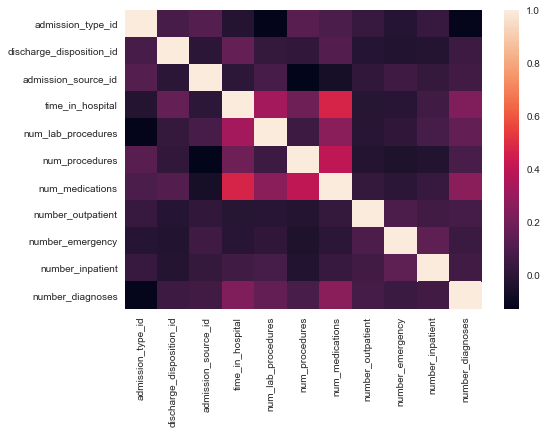

In [3]:
# Looking at correlation - keep an eye out for time_in_hospital vs num_medications
corr = train.corr()
sns.heatmap(corr)

(array([0, 1, 2, 3]),
 [Text(0, 0, '>7'), Text(0, 1, 'Norm'), Text(0, 2, '>8'), Text(0, 3, 'None')])

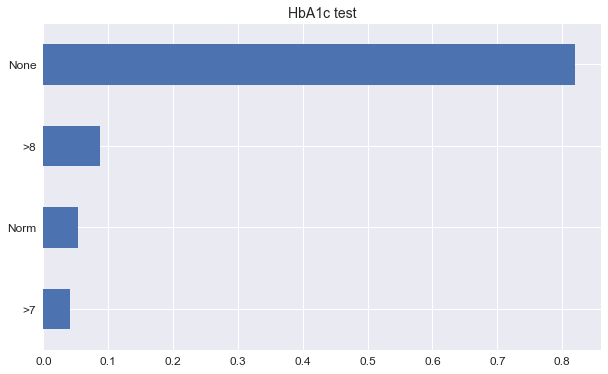

In [4]:
# HbA1c plot
plt.figure(figsize=(10,6))
a1cr_plot = train.A1Cresult.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('HbA1c test',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1]), [Text(0, 0, 'Ch'), Text(0, 1, 'No')])

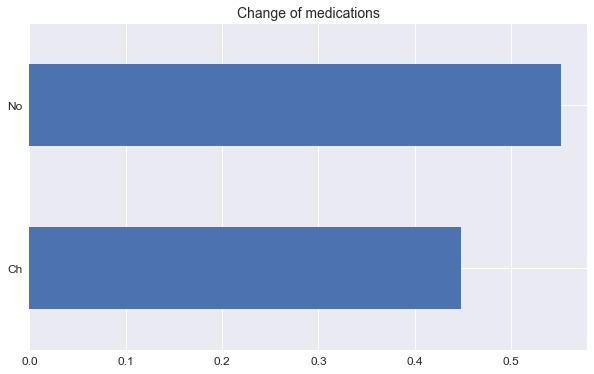

In [5]:
# Med change plot
plt.figure(figsize=(10,6))
change_plot = train.change.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('Change of medications',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

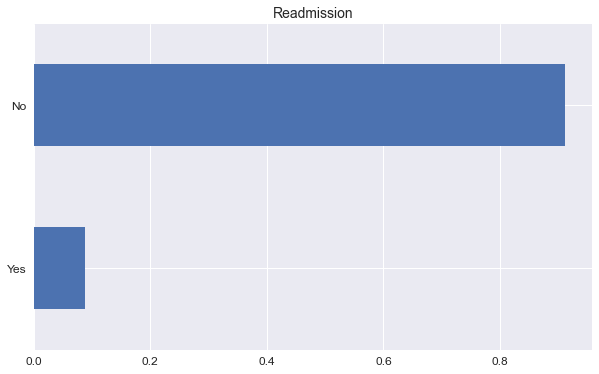

In [6]:
# Readmission plot
plt.figure(figsize=(10,6))
readmission_plot = train.readmitted.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('Readmission',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1]), [Text(0, 0, 'Male'), Text(0, 1, 'Female')])

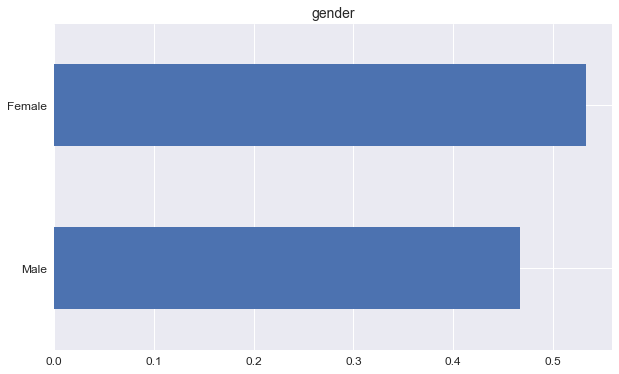

In [7]:
# Gender plot
plt.figure(figsize=(10,6))
gender_plot = train.gender.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('gender',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '[0-10)'),
  Text(0, 1, '[10-20)'),
  Text(0, 2, '[20-30)'),
  Text(0, 3, '[90-100)'),
  Text(0, 4, '[30-40)'),
  Text(0, 5, '[40-50)'),
  Text(0, 6, '[80-90)'),
  Text(0, 7, '[50-60)'),
  Text(0, 8, '[60-70)'),
  Text(0, 9, '[70-80)')])

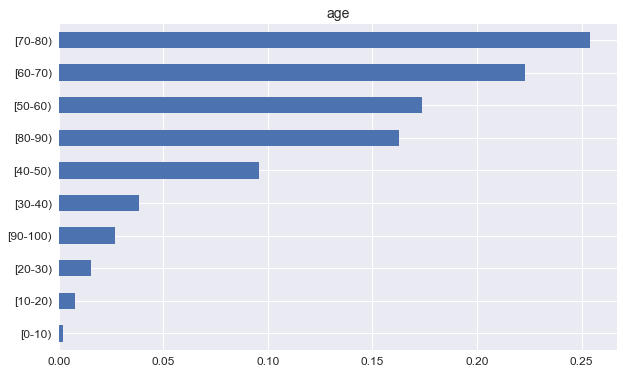

In [8]:
# age plot
plt.figure(figsize=(10,6))
age_plot = train.age.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('age',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asian'),
  Text(0, 1, 'Other'),
  Text(0, 2, 'Hispanic'),
  Text(0, 3, 'unknown'),
  Text(0, 4, 'AfricanAmerican'),
  Text(0, 5, 'Caucasian')])

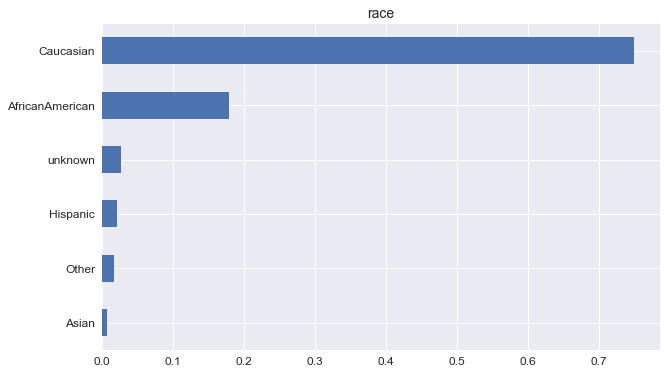

In [9]:
# Race plot
plt.figure(figsize=(10,6))
race_plot = train.race.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('race',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [10]:
train['max_glu_serum'].replace('>300','>200',inplace=True)
train['A1Cresult'].replace('>8','>7',inplace=True)

# Max Glucose Serum

In [11]:
#Readmission Table 1: Max Glucouse Serum
train[['max_glu_serum','readmitted', 'race']].groupby(['max_glu_serum','readmitted']).count()

race
max_glu_serum readmitted       
>200          No           1232
              Yes           144
None          No          49693
              Yes          4749
Norm          No           1259
              Yes           135

In [12]:
#Percentage
train[['max_glu_serum','readmitted', 'race']].groupby(['max_glu_serum','readmitted']).count().apply(lambda x: x/train.race.count())

race
max_glu_serum readmitted          
>200          No          0.021534
              Yes         0.002517
None          No          0.868577
              Yes         0.083007
Norm          No          0.022006
              Yes         0.002360

#### Showing Percentage of Max Glucose Serum Readmitted 

In [53]:
#Showing only YES Values
maxglu_percent = train[['max_glu_serum','readmitted', 'race']].groupby(['max_glu_serum','readmitted']).count().apply(lambda x: x/train.race.count())
maxglu_percent = maxglu_percent.xs('Yes', level=1, drop_level=False)
maxglu_percent = maxglu_percent.reset_index()
maxglu_percent.columns = ['max_glu_serum', 'readmitted', 'Percentage']
maxglu_percent

,max_glu_serum,readmitted,Percentage
0,>200,Yes,0.002517
1,None,Yes,0.083007
2,Norm,Yes,0.002360


## A1c 

In [13]:
#Readmission Table 2: A1C Result 
train[['A1Cresult','readmitted', 'race']].groupby(['A1Cresult','readmitted']).count()

race
A1Cresult readmitted       
>7        No           6700
          Yes           603
None      No          42720
          Yes          4170
Norm      No           2764
          Yes           255

In [14]:
#Percentage 
train[['A1Cresult','readmitted', 'race']].groupby(['A1Cresult','readmitted']).count().apply(lambda x: x/train.race.count())

race
A1Cresult readmitted          
>7        No          0.117108
          Yes         0.010540
None      No          0.746696
          Yes         0.072887
Norm      No          0.048312
          Yes         0.004457

#### Showing Percentage of A1C Result Readmitted 

In [48]:
#Showing only YES Values
a1c_percent = train[['A1Cresult','readmitted', 'race']].groupby(['A1Cresult','readmitted']).count().apply(lambda x: x/train.race.count())
a1c_percent = a1c_percent.xs('Yes', level=1, drop_level=False)
a1c_percent = a1c_percent.reset_index()
a1c_percent.columns = ['A1Cresult', 'readmitted', 'Percentage']
a1c_percent

,A1Cresult,readmitted,Percentage
0,>7,Yes,0.010540
1,None,Yes,0.072887
2,Norm,Yes,0.004457


## Gender


In [15]:
#Readmission Table 3: Gender
train[['gender','readmitted', 'race']].groupby(['gender','readmitted']).count()

race
gender readmitted       
Female No          27789
       Yes          2697
Male   No          24395
       Yes          2331

In [16]:
#Percentage 
train[['gender','readmitted', 'race']].groupby(['gender','readmitted']).count().apply(lambda x: x/train.race.count())

race
gender readmitted          
Female No          0.485720
       Yes         0.047140
Male   No          0.426397
       Yes         0.040743

#### Showing Percentage of Gender Readmitted

In [52]:
#Show only YES Values
gender_percent = train[['gender','readmitted', 'race']].groupby(['gender','readmitted']).count().apply(lambda x: x/train.race.count())
gender_percent = gender_percent.xs('Yes', level=1, drop_level=False)
gender_percent = gender_percent.reset_index()
gender_percent.columns = ['gender', 'readmitted', 'Percentage']
gender_percent

,gender,readmitted,Percentage
0,Female,Yes,0.047140
1,Male,Yes,0.040743


## Age


In [18]:
#Readmission Table 4: Age
train[['age','readmitted', 'race']].groupby(['age','readmitted']).count()

race
age      readmitted       
[0-10)   No            124
         Yes             3
[10-20)  No            416
         Yes            20
[20-30)  No            818
         Yes            70
[30-40)  No           2041
         Yes           143
[40-50)  No           5081
         Yes           405
[50-60)  No           9250
         Yes           691
[60-70)  No          11623
         Yes          1130
[70-80)  No          13073
         Yes          1464
[80-90)  No           8356
         Yes           962
[90-100) No           1402
         Yes           140

In [19]:
#Percentage
train[['age','readmitted', 'race']].groupby(['age','readmitted']).count().apply(lambda x: x/train.race.count())

race
age      readmitted          
[0-10)   No          0.002167
         Yes         0.000052
[10-20)  No          0.007271
         Yes         0.000350
[20-30)  No          0.014298
         Yes         0.001224
[30-40)  No          0.035674
         Yes         0.002499
[40-50)  No          0.088810
         Yes         0.007079
[50-60)  No          0.161679
         Yes         0.012078
[60-70)  No          0.203157
         Yes         0.019751
[70-80)  No          0.228501
         Yes         0.025589
[80-90)  No          0.146053
         Yes         0.016815
[90-100) No          0.024505
         Yes         0.002447

#### Showing Percentage of Age Readmitted 

In [45]:
#Show only YES Values
age_percent = train[['age','readmitted', 'race']].groupby(['age','readmitted']).count().apply(lambda x: x/train.race.count())
age_percent = age_percent.xs('Yes', level=1, drop_level=False)
age_percent = age_percent.reset_index()
age_percent.columns = ['Age', 'readmitted', 'Percentage']
age_percent

,Age,readmitted,Percentage
0,[0-10),Yes,0.000052
1,[10-20),Yes,0.000350
2,[20-30),Yes,0.001224
3,[30-40),Yes,0.002499
4,[40-50),Yes,0.007079
5,[50-60),Yes,0.012078
6,[60-70),Yes,0.019751
7,[70-80),Yes,0.025589
8,[80-90),Yes,0.016815
9,[90-100),Yes,0.002447


## Race

In [21]:
#Readmission Table 5: Race count
train[['race','readmitted', 'gender']].groupby(['race','readmitted']).count()

gender
race            readmitted        
AfricanAmerican No            9407
                Yes            852
Asian           No             356
                Yes             30
Caucasian       No           38959
                Yes           3874
Hispanic        No            1135
                Yes             98
Other           No             881
                Yes             62
unknown         No            1446
                Yes            112

In [22]:
#Percentage of readmitted by race
train[['race','readmitted', 'gender']].groupby(['race','readmitted']).count().apply(lambda x: x/train.gender.count())

gender
race            readmitted          
AfricanAmerican No          0.164424
                Yes         0.014892
Asian           No          0.006222
                Yes         0.000524
Caucasian       No          0.680959
                Yes         0.067713
Hispanic        No          0.019838
                Yes         0.001713
Other           No          0.015399
                Yes         0.001084
unknown         No          0.025274
                Yes         0.001958

#### Showing Percentage of Race Readmitted 

In [23]:
#Show only YES Values
race_percent = train[['race','readmitted', 'gender']].groupby(['race','readmitted']).count().apply(lambda x: x/train.gender.count())
race_percent = race_percent.xs('Yes', level=1, drop_level=False)
race_percent = race_percent.reset_index()
race_percent.columns = ['race', 'readmitted', 'Percentage']
race_percent

,race,readmitted,Percentage
0,AfricanAmerican,Yes,0.014892
1,Asian,Yes,0.000524
2,Caucasian,Yes,0.067713
3,Hispanic,Yes,0.001713
4,Other,Yes,0.001084
5,unknown,Yes,0.001958


In [24]:
#train.profile_report()